In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [8,6]
sns.set_style("darkgrid")
titanic_data = sns.load_dataset('titanic')
titanic_data2 = titanic_data[["embark_town", "age", "fare"]]
titanic_data2.head()
titanic_data2.isnull().mean()

embark_town    0.002245
age            0.198653
fare           0.000000
dtype: float64

In [2]:
titanic_data.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [3]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


Text(0, 0.5, 'Number of Passengers')

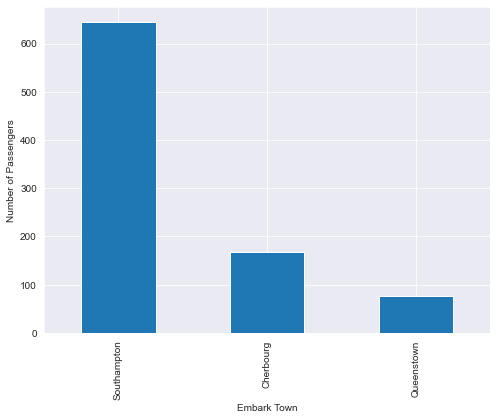

In [4]:
titanic_data.embark_town.value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('Embark Town')
plt.ylabel('Number of Passengers')

In [5]:
# looking at the mode of a variable
titanic_data.embark_town.mode()

0    Southampton
dtype: object

In [6]:
#let's continue with titanic2

titanic_data.embark_town.fillna('Sothampton', inplace=True)

In [7]:
titanic_data2.embark_town.value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [8]:
titanic_data.age.mode()

0    24.0
dtype: float64

In [ ]:
import numpy as np #is it not better to put it at the start
titanic_data['age_mode'] = titanic_data.age.fillna(24)# generating new variable and replacing the missing values
titanic_data.head(20)

In [10]:
print(titanic_data["class"])
type(titanic_data["class"])

0       Third
1       First
2       Third
3       First
4       Third
        ...  
886    Second
887     First
888     Third
889     First
890     Third
Name: class, Length: 891, dtype: category
Categories (3, object): ['First', 'Second', 'Third']


pandas.core.series.Series

In [11]:
titanic_data["class"]

0       Third
1       First
2       Third
3       First
4       Third
        ...  
886    Second
887     First
888     Third
889     First
890     Third
Name: class, Length: 891, dtype: category
Categories (3, object): ['First', 'Second', 'Third']

In [12]:
print(type(titanic_data[["class", "sex", "age"]]))

<class 'pandas.core.frame.DataFrame'>


In [13]:
#select multiple columns by passing a list of column names inside a string to the square brackets.
titanic_data[["class", "sex", "age"]]

,class,sex,age
0,Third,male,22.0
1,First,female,38.0
2,Third,female,26.0
3,First,female,35.0
4,Third,male,35.0
...,...,...,...
886,Second,male,27.0
887,First,female,19.0
888,Third,female,NaN
889,First,male,26.0


In [14]:
# doing a subset in data by extracting a specifying values in column

my_df = titanic_data[titanic_data["sex"] == "male"]
my_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mode
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.0
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,24.0
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,54.0
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,2.0


In [15]:
my_df2 = titanic_data[titanic_data['sex']!='male']
my_df2.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mode
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.0
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,27.0
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False,14.0


In [20]:
# doing a subset in data by extracting a specifying values in column
my_df3 = titanic_data[(titanic_data['sex'] =='male') & (titanic_data['class']=='Second')]
my_df3.head()



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mode
17,1,2,male,NaN,0,0,13.0,S,Second,man,True,NaN,Southampton,yes,True,24.0
20,0,2,male,35.0,0,0,26.0,S,Second,man,True,NaN,Southampton,no,True,35.0
21,1,2,male,34.0,0,0,13.0,S,Second,man,True,D,Southampton,yes,True,34.0
33,0,2,male,66.0,0,0,10.5,S,Second,man,True,NaN,Southampton,no,True,66.0
70,0,2,male,32.0,0,0,10.5,S,Second,man,True,NaN,Southampton,no,True,32.0


In [26]:
# doing a subset in data by extracting a specifying values in column
my_df = titanic_data[(titanic_data["sex"] == "male") & (titanic_data["class"] == "First") ]

my_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mode
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,54.0
23,1,1,male,28.0,0,0,35.5000,S,First,man,True,A,Southampton,yes,True,28.0
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False,19.0
30,0,1,male,40.0,0,0,27.7208,C,First,man,True,NaN,Cherbourg,no,True,40.0
34,0,1,male,28.0,1,0,82.1708,C,First,man,True,NaN,Cherbourg,no,False,28.0


In [27]:
# doing a subset in data by extracting a specifying values in column
my_df = titanic_data[(titanic_data["sex"] == "male") & (titanic_data["age"] <=25)]
my_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mode
0,0,3,male,22.0,1,0,7.250,S,Third,man,True,NaN,Southampton,no,False,22.0
7,0,3,male,2.0,3,1,21.075,S,Third,child,False,NaN,Southampton,no,False,2.0
12,0,3,male,20.0,0,0,8.050,S,Third,man,True,NaN,Southampton,no,True,20.0
16,0,3,male,2.0,4,1,29.125,Q,Third,child,False,NaN,Queenstown,no,False,2.0
27,0,1,male,19.0,3,2,263.000,S,First,man,True,C,Southampton,no,False,19.0


In [28]:
# using isin function to specify range of values
ages = [20,21,22]
age_dataset = titanic_data[titanic_data["age"].isin(ages)]
age_dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mode
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False,22.0
12,0,3,male,20.0,0,0,8.05,S,Third,man,True,NaN,Southampton,no,True,20.0
37,0,3,male,21.0,0,0,8.05,S,Third,man,True,NaN,Southampton,no,True,21.0
51,0,3,male,21.0,0,0,7.80,S,Third,man,True,NaN,Southampton,no,True,21.0
56,1,2,female,21.0,0,0,10.50,S,Second,woman,False,NaN,Southampton,yes,True,21.0


In [29]:
# using isin function to specify range of values
ages = [20,21,22]
age_dataset = titanic_data[(titanic_data["age"].isin(ages)) & (titanic_data['sex']=='male')]
age_dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mode
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.0
12,0,3,male,20.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,20.0
37,0,3,male,21.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,21.0
51,0,3,male,21.0,0,0,7.8000,S,Third,man,True,NaN,Southampton,no,True,21.0
60,0,3,male,22.0,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True,22.0
